### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sigfig
from scipy.integrate import quad


### 2.6

Let's begin by defining a function for the $k$-th Lagrange polynomial.

In [2]:
def lagrange(k, x, nodes):
    
    L_x = 1
    for j in range(len(nodes)):
        if j != k:
            L_x *= (x-nodes[j])/(nodes[k]-nodes[j])

    return L_x


#### a)

Now we can define the Lambda function for computing the Lebesgue number.

In [3]:
def Lambda(m):
    
    nodes = np.linspace(-1,1,m+1)
    x_vals = np.linspace(-1,1,100)
    sums = []
    
    for x in x_vals:
        val = 0
        for j in range(m+1):
            val += abs(lagrange(j, x, nodes))
        sums.append(val)
        
#     plt.plot(x_vals, sums)
#     plt.show()
    
    return max(sums)


In [4]:
print(f'Lambda(10) = {Lambda(10)}')

Lambda(10) = 29.897047001679912


#### b)

Now let's plot $\Lambda_{m}$ for different $m$ up to 30.

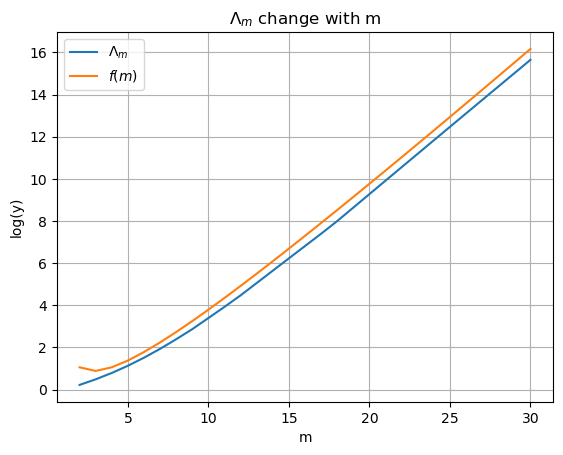

In [5]:
# define function and initialise m values
f_m = lambda m: 2**m/(m*np.log(m))
m_vals = [m for m in range(2, 31)]

# plot Lambda and function against m
plt.plot(m_vals, [np.log(Lambda(m)) for m in m_vals], label='$\Lambda_{m}$')
plt.plot(m_vals, [np.log(f_m(m)) for m in m_vals], label='$f(m)$')
plt.title('$\Lambda_{m}$ change with m')
plt.xlabel('m')
plt.ylabel('log(y)')
plt.legend()
plt.grid()
plt.show()


Note here that for $f(m) = \frac{2^m}{m\log(m)}$, we have that the two curves above are parallel. Since the y-axis is log scaled, this implies that $f(m)$ is some constant scaling of $\Lambda_{m}$ and so this numerical problem is well-posed since there is a unique solution that continuously depends on the data. Similarly the numerical method is stable too. Plotting a multiplicatively scaled $f(x)$, we have:

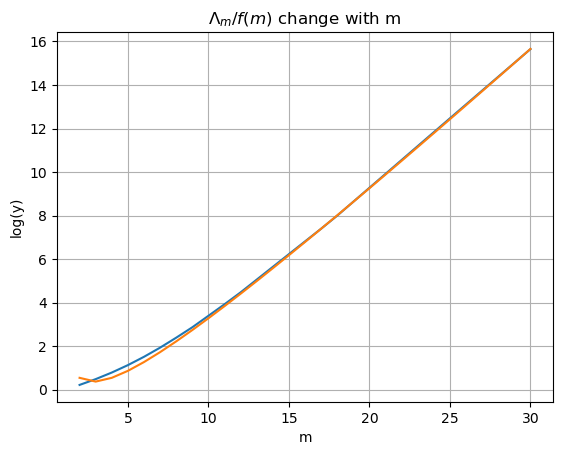

In [6]:
plt.plot(m_vals, [np.log(Lambda(m)) for m in m_vals], label='$\Lambda_{m}$')
plt.plot(m_vals, [np.log(0.6*f_m(m)) for m in m_vals], label='$f(m)$')
plt.title('$\Lambda_{m}/f(m)$ change with m')
plt.xlabel('m')
plt.ylabel('log(y)')
plt.grid()
plt.show()


And so, the method is also convergent with the scaled $f(x)$.

#### c)

Let's define the new Lambda function with different nodes and plot this too.

In [7]:
def LambdaC(m):
    
    nodes = np.array([np.cos(np.pi*i/m) for i in range(m+1)])
    x_vals = np.linspace(-1,1,100)
    sums = []
    
    for x in x_vals:
        val = 0
        for j in range(m+1):
            val += abs(lagrange(j, x, nodes))
        sums.append(val)
        
#     plt.plot(x_vals, sums)
#     plt.show()
    
    return max(sums)


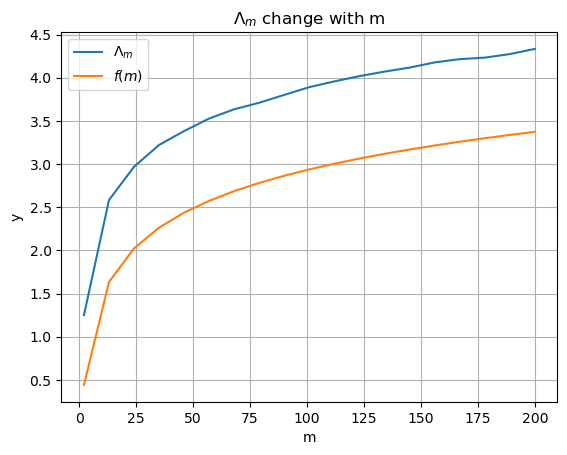

In [8]:
# define function and initialise m values
f_m2 = lambda m: 2*np.log(m)/np.pi
m_vals = [2+11*i for i in range(19)]

# plot Lambda and function against m
plt.plot(m_vals, [LambdaC(m) for m in m_vals], label='$\Lambda_{m}$')
plt.plot(m_vals, [f_m2(m) for m in m_vals], label='$f(m)$')
plt.title('$\Lambda_{m}$ change with m')
plt.xlabel('m')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


This time the curve of $\Lambda_{m}$ is parallel to $f(m) = \frac{2}{\pi}\log(m)$...

This curve seems a bit more unstable with $\Lambda_{m}$ appearing a bit more 'wobbly'. Although the problem is still well-posed, convergence is not as obvious either. If we look at the error by subtracting an additively scaled $f(x)$, we get: 

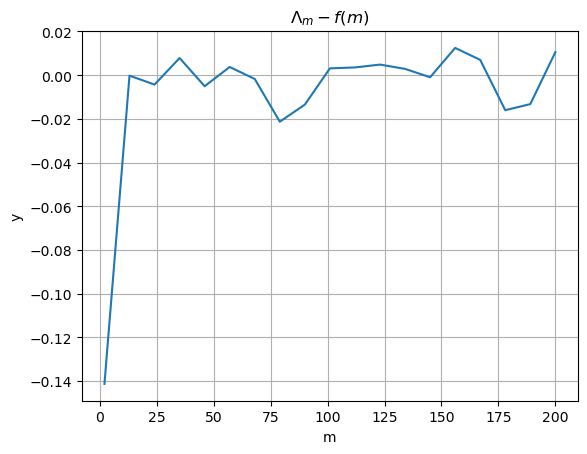

In [9]:
# plot Lambda and function against m
plt.plot(m_vals, [LambdaC(m)-f_m2(m)-0.95 for m in m_vals], label='$\Lambda_{m}$')
plt.title('$\Lambda_{m}-f(m)$')
plt.xlabel('m')
plt.ylabel('y')
plt.grid()
plt.show()

And so, this time the numerical method is not as stable or convergent. However this may also be due to larger values of m.

### 2.7

#### a)

Let's define the recursive function $f[x_0, x_1, ..., x_n]$.

In [10]:
def recursive_f(f,nodes):
    if len(nodes) == 1:
        return f(nodes[0])
    val = (recursive_f(f,nodes[1:])-recursive_f(f,nodes[:-1]))/(nodes[-1]-nodes[0])
    return val

In [11]:
print(f'sin[0,1,2,3] = {recursive_f(np.sin,[0,1,2,3])}')
                         

sin[0,1,2,3] = -0.010393219665581396


#### b)

Now let's define $q_k(x)$.

In [12]:
def qk(f, nodes, k, x):
    if k==0:
        return f(nodes[0])
    val = qk(f, nodes, k-1, x) + recursive_f(f,nodes[:k+1])*np.prod([x-i for i in nodes[:k]])
    return val


Now let's plot this for $f(x) = \tan^{-1}(x)$ with nodes $(0,1,2,3,4)$.

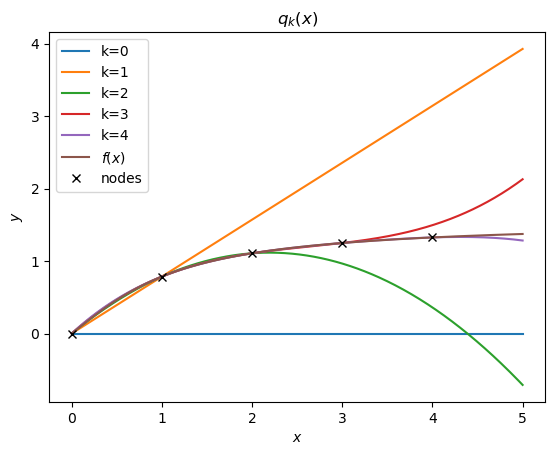

In [13]:
x_vals = np.linspace(0,5,500)
nodes = [0,1,2,3,4]

for k in range(5):
    plt.plot(x_vals, [qk(np.arctan, nodes, k, x) for x in x_vals], label=f'k={k}')
plt.plot(x_vals, np.arctan(x_vals), label='$f(x)$')
plt.plot(nodes, np.arctan(nodes), 'xk', label='nodes')
plt.title('$q_k(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()


### 2.8

#### a)

Let's first define the three integral quadrature formulas.

In [14]:
def midpoint(f,a,b):
    return (b-a)*f(0.5*(a+b))
    
def trapezoidal(f,a,b):
    return 0.5*(b-a)*(f(a)+f(b))
    
def simpson(f,a,b):
    return (b-a)/6*(f(a)+4*f(0.5*(a+b))+f(b))


Now we can approximate $f(x) = \exp(2x)$ on $[-1,1]$.

In [15]:
# define function and values
f_x = lambda x: np.exp(2*x)
a, b = -1, 1

# true value of integral
integral = quad(f_x,a,b)[0]
print(f'True value of integral: {integral}')

# make a dataframe of results
df = pd.DataFrame({
    'Method': ['Midpoint', 'Trapezoidal', 'Simpson'], 
    'Value': [midpoint(f_x,a,b), trapezoidal(f_x,a,b), simpson(f_x,a,b)]
})

# compute error and display
df['Error'] = df['Value'].apply(lambda x: sigfig.round(abs(x - integral), sigfigs=3))
display(df)


True value of integral: 3.6268604078470186


,Method,Value,Error
0,Midpoint,2.000000,1.630
1,Trapezoidal,7.524391,3.900
2,Simpson,3.841464,0.215


As we can see, Cavalierie-Simpson produces the most accurate approximation. On the other hand, the midpoint approximation is just over half the true value and the trapezoidal formula is off by over a factor of two. This shows that midpoint and trapezoid are comparable and Simpson is significantly better (though this is only one example).

#### b)

Now let's plot $f(x) = \frac{1}{1+x}$ over $[0,h]$ for different $h=\frac{1}{2^k}$.

In [16]:
# define function
f_x = lambda x: 1/(1+x)
true_vals, mp_vals, trap_vals, simp_vals = [[] for _ in range(4)]
h_vals = [2**(-k) for k in range(11)]

# formula values
for h in h_vals:
    true_vals.append(quad(f_x, 0, h)[0])
    mp_vals.append(midpoint(f_x, 0, h))
    trap_vals.append(trapezoidal(f_x, 0, h))
    simp_vals.append(simpson(f_x, 0, h))

# error values
mp_errors = abs(np.array(mp_vals) - np.array(true_vals))
trap_errors = abs(np.array(trap_vals) - np.array(true_vals))
simp_errors = abs(np.array(simp_vals) - np.array(true_vals))


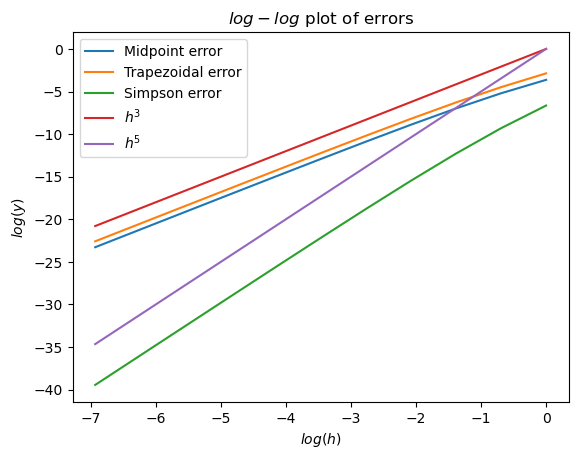

In [17]:
# plot error curves and h^gamme
plt.plot(np.log(h_vals), np.log(mp_errors), label='Midpoint error')
plt.plot(np.log(h_vals), np.log(trap_errors), label='Trapezoidal error')
plt.plot(np.log(h_vals), np.log(simp_errors), label='Simpson error')
plt.plot(np.log(h_vals), [np.log(h**3) for h in h_vals], label='$h^3$')
plt.plot(np.log(h_vals), [np.log(h**5) for h in h_vals], label='$h^5$')

plt.title('$log-log$ plot of errors')
plt.xlabel('$log(h)$')
plt.ylabel('$log(y)$')
plt.legend()
plt.show()


Plotting the error curves for the midpoint, trapezoidal and Cavalierie-Simpson formulae, we see that $h^3$ is parallel to the first two and $h^5$ is parallel to the latter. This also matches up to the rough result we saw in part (a) above with the first two methods not seeming as accurate as Cavalierie-Simpson.

Since we are looking at exponentially changing domain sizes (the interval halves for every subsequent data point) we can see here that the error scaling follows the results derived in the lecture notes. Namely that midpoint and trapezoidal have errors $E_0(f)$, $E_1(f)$ proportional to $(b-a)^3$ and Simpson has error $E_2(f)$ proportional to $(b-a)^5$, hence the respective $h^{\gamma}$ values.

#### c)

Like in the lecture notes, we have the EOC $= \frac{1}{log(2)}log(\frac{e^k-1}{e^k})$.

In [18]:
# create initial dataframe
df_eoc = pd.DataFrame({
    'h': h_vals,
    'Midpoint_errors': mp_errors,
    'Trapezoid_errors': trap_errors,
    'Simpson_errors': simp_errors
})

# compute EOCs
df_eoc['Midpoint'] = round(np.log(df_eoc['Midpoint_errors'].shift(1)/df_eoc['Midpoint_errors'])/np.log(2),3)
df_eoc['Trapezoid'] = round(np.log(df_eoc['Trapezoid_errors'].shift(1)/df_eoc['Trapezoid_errors'])/np.log(2),3)
df_eoc['Simpson'] = round(np.log(df_eoc['Simpson_errors'].shift(1)/df_eoc['Simpson_errors'])/np.log(2),3)

# present data
df_eoc.drop(columns=['Midpoint_errors','Trapezoid_errors','Simpson_errors'], inplace=True)
df_eoc


,h,Midpoint,Trapezoid,Simpson
0,1.000000,NaN,NaN,NaN
1,0.500000,2.277,2.344,3.842
2,0.250000,2.568,2.593,4.298
3,0.125000,2.760,2.768,4.606
4,0.062500,2.873,2.875,4.790
5,0.031250,2.935,2.935,4.891
6,0.015625,2.967,2.967,4.945
7,0.007812,2.983,2.983,4.972
8,0.003906,2.992,2.992,4.986
9,0.001953,2.996,2.996,4.993


This matches up with the graphical representation we saw above, converging to 3 for midpoint and trapezoid, and 5 for Simpson.